In [6]:
import gillespy2 as gl

In [9]:
def create_ACA(parameter_values=None):
    # Intialize the Model with a name of your choosing.
    model = gl.Model(name="AT-all")

    SS = gl.Species(name="SS", initial_value=2)
    L1 = gl.Species(name="L1", initial_value=0)
    L2 = gl.Species(name="L2", initial_value=0)
    R1 = gl.Species(name="R1", initial_value=0)
    R2 = gl.Species(name="R2", initial_value=0)
    D  = gl.Species(name="D", initial_value=0)

    # Add the Variables to the Model.
    model.add_species([SS, L1, L2, R1, R2, D])

    kf_dl = 4e8
    nonspecific_correction = 1/5

    sliding_correction = 1/2
    kf_sliding = 1e7 * sliding_correction

    Na = 6.023e23

    kf_ssl1 = gl.Parameter(name='kf_ssl1', expression=kf_dl*nonspecific_correction)
    kb_ssl1 = gl.Parameter(name='kb_ssl1', expression=22.920792678077465 )
    kf_ssl2 = gl.Parameter(name='kf_ssl2', expression=kf_dl*nonspecific_correction)
    kb_ssl2 = gl.Parameter(name='kb_ssl2', expression=0.007808225837362128)
    kf_ssr2 = gl.Parameter(name='kf_ssr2', expression=kf_dl*nonspecific_correction)
    kb_ssr2 = gl.Parameter(name='kb_ssr2', expression=0.0626785751957368)
    kf_ssr1 = gl.Parameter(name='kf_ssr1', expression=kf_dl*nonspecific_correction)
    kb_ssr1 = gl.Parameter(name='kb_ssr1', expression=183.99091641848813)
    kf_ssD  = gl.Parameter(name='kf_ssD', expression=kf_dl*nonspecific_correction)
    kb_ssD  = gl.Parameter(name='kb_ssD', expression=6.902831840829526e-08)
    kf_l1l2 = gl.Parameter(name='kf_l1l2', expression=kf_sliding)
    kb_l1l2 = gl.Parameter(name='kb_l1l2', expression=3406.6124793451313*sliding_correction)
    kf_l2D  = gl.Parameter(name='kf_l2D', expression=kf_sliding)
    kb_l2D  = gl.Parameter(name='kb_l2D', expression=88.40461309148736*sliding_correction)
    kf_r1r2 = gl.Parameter(name='kf_r1r2', expression=kf_sliding)
    kb_r1r2 = gl.Parameter(name='kb_r1r2', expression=3406.6124793451313*sliding_correction)
    kf_r2D  = gl.Parameter(name='kf_r2D', expression=kf_sliding)
    kb_r2D  = gl.Parameter(name='kb_r2D', expression=11.01306438328072*sliding_correction)


    # Add the Parameters to the Model.
    model.add_parameter([   kf_ssl1,kb_ssl1,
                            kf_ssl2,kb_ssl2,
                            kf_ssr2,kb_ssr2,
                            kf_ssr1,kb_ssr1,
                            kf_ssD, kb_ssD,
                            kf_l1l2,kb_l1l2,
                            kf_l2D, kb_l2D,
                            kf_r1r2,kb_r1r2,
                            kf_r2D, kb_r2D  ])


    fwd_ssl1 = gl.Reaction(name="ss_l1_f",  reactants={'SS': 2},    products={'L1': 1}, rate='kf_ssl1')
    bwd_ssl1 = gl.Reaction(name="ss_l1_b",  reactants={'L1': 1},    products={'SS': 2}, rate='kb_ssl1')
    fwd_ssl2 = gl.Reaction(name="ss_l2_f",  reactants={'SS': 2},    products={'L2': 1}, rate='kf_ssl2')
    bwd_ssl2 = gl.Reaction(name="ss_l2_b",  reactants={'L2': 1},    products={'SS': 2}, rate='kb_ssl2')
    fwd_ssr2 = gl.Reaction(name="ss_r2_f",  reactants={'SS': 2},    products={'R2': 1}, rate='kf_ssr2')
    bwd_ssr2 = gl.Reaction(name="ss_r2_b",  reactants={'R2': 1},    products={'SS': 2}, rate='kb_ssr2')
    fwd_ssr1 = gl.Reaction(name="ss_r1_f",  reactants={'SS': 2},    products={'R1': 1}, rate='kf_ssr1')
    bwd_ssr1 = gl.Reaction(name="ss_r1_b",  reactants={'R1': 1},    products={'SS': 2}, rate='kb_ssr1')
    fwd_ssD  = gl.Reaction(name="ss_D_f ",  reactants={'SS': 2},    products={'D': 1},  rate='kf_ssD')
    bwd_ssD  = gl.Reaction(name="ss_D_b ",  reactants={'D': 1},     products={'SS': 2}, rate='kb_ssD')
    fwd_l1l2 = gl.Reaction(name="l1_l2_f",  reactants={'L1': 1},    products={'L2': 1}, rate='kf_l1l2')
    bwd_l1l2 = gl.Reaction(name="l1_l2_b",  reactants={'L2': 1},    products={'L1': 1}, rate='kb_l1l2')
    fwd_l2D  = gl.Reaction(name="l2_D_f ",  reactants={'L2': 1},    products={'D': 1},  rate='kf_l2D')
    bwd_l2D  = gl.Reaction(name="l2_D_b ",  reactants={'D': 1},     products={'L2': 1}, rate='kb_l2D')
    fwd_r1r2 = gl.Reaction(name="r1_r2_f",  reactants={'R1': 1},    products={'R2': 1}, rate='kf_r1r2')
    bwd_r1r2 = gl.Reaction(name="r1_r2_b",  reactants={'R2': 1},    products={'R1': 1}, rate='kb_r1r2')
    fwd_r2D  = gl.Reaction(name="r2_D_f ",  reactants={'R2': 1},    products={'D': 1},  rate='kf_r2D')
    bwd_r2D  = gl.Reaction(name="r2_D_b ",  reactants={'D': 1},     products={'R2': 1}, rate='kb_r2D')
    
    
    
    # Add the Reactions to the Model.
    model.add_reaction([    fwd_ssl1,bwd_ssl1,
                            fwd_ssl2,bwd_ssl2,
                            fwd_ssr2,bwd_ssr2,
                            fwd_ssr1,bwd_ssr1,
                            fwd_ssD,bwd_ssD,
                            fwd_l1l2,bwd_l1l2,
                            fwd_l2D,bwd_l2D,
                            fwd_r1r2,bwd_r1r2,
                            fwd_r2D,bwd_r2D ])

    # Define the timespan of the model.
    tspan = gl.TimeSpan.linspace(t=1e-2, num_points=100)
    
    # Set the timespan of the Model.
    model.timespan(tspan)
    return model

In [10]:
model = create_ACA()

In [16]:
results = model.run()

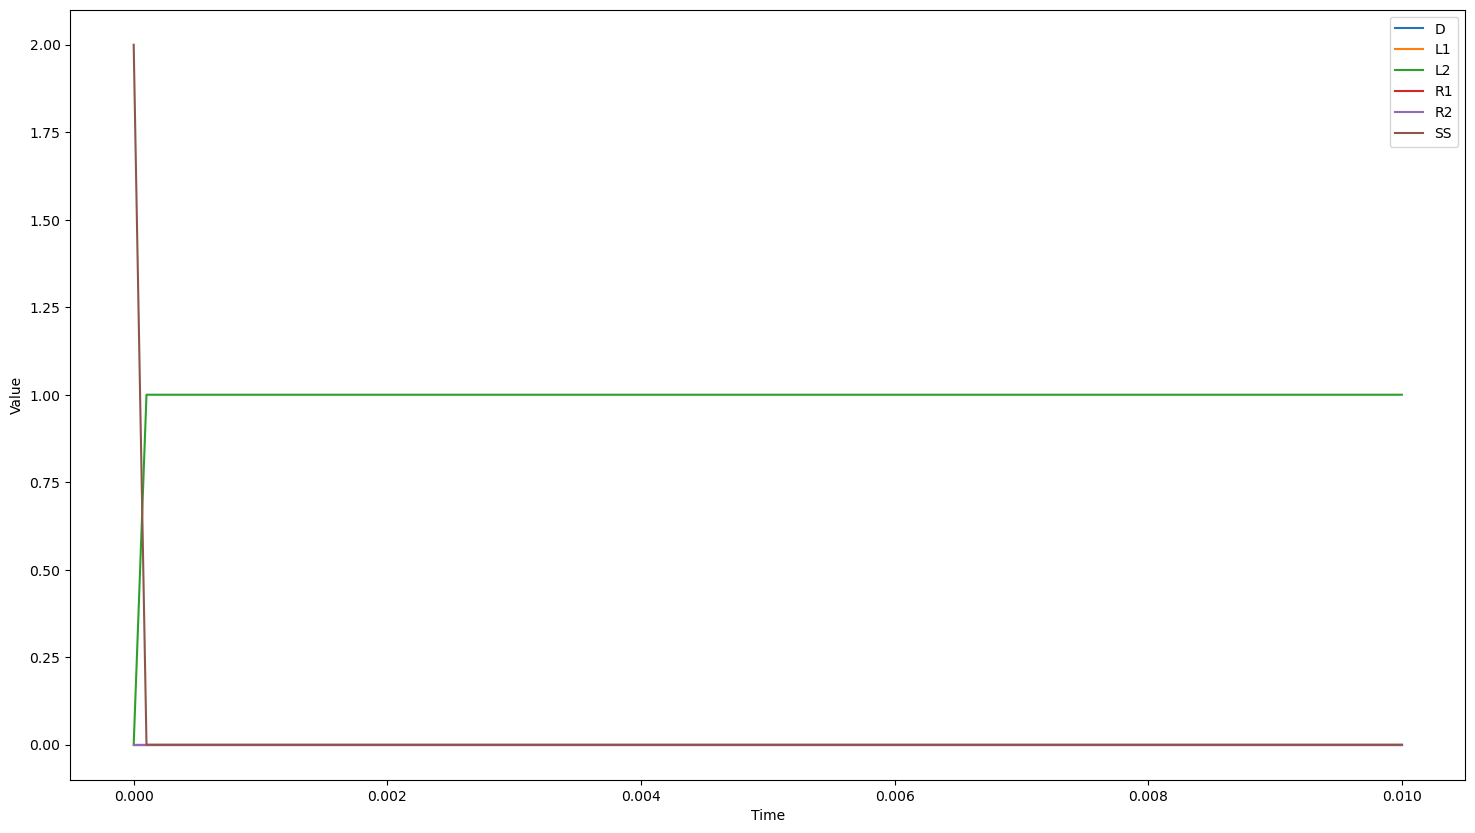

In [17]:
results.plot()

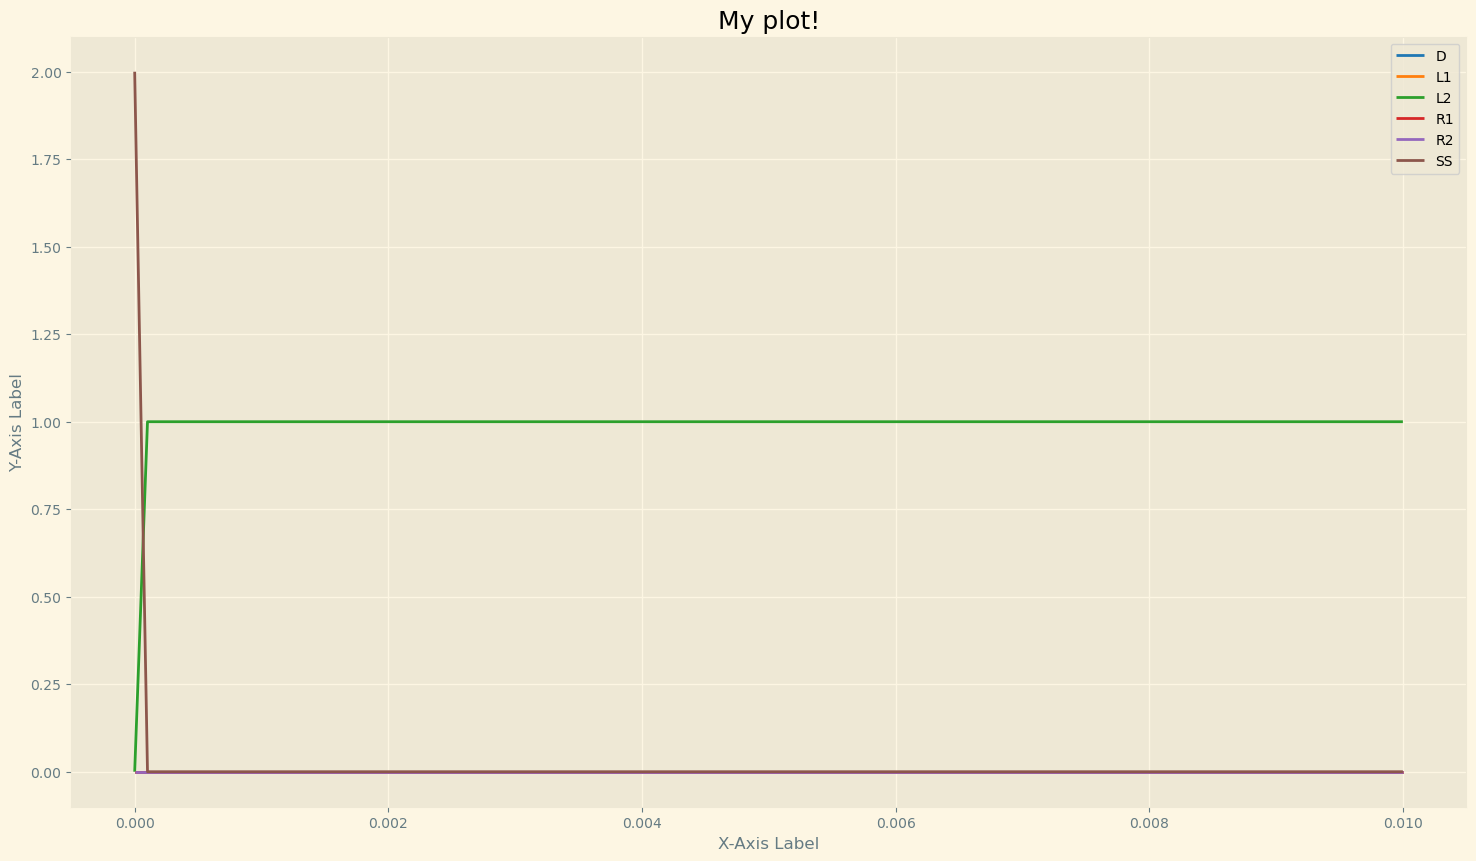

In [15]:
results.plot(
	# Set the title of the X and Y axis.
	xaxis_label="X-Axis Label",
	yaxis_label="Y-Axis Label", 

	# Set the title of the plot.
	title="My plot!",

	# Set to True to show the legend, False to hide it.
	show_legend=True,

	# Set to True to show a graph for each simulation trajectory, False for just one.
	multiple_graphs=False,

	# Set to the name of a matplotlib stylesheet. More designs can be found at the following link:
	# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
	style="Solarize_Light2"
)